## 필요 라이브러리

In [819]:
import json
import folium
import os
import re
import sys
mod = sys.modules[__name__]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
plt.style.use('ggplot')


import geopandas as gpd
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.2f}'.format
import chart_studio.plotly as py
import cufflinks as cf
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

## 인구 단계 표현

##### 1. 파일 불러오기 및 정제

In [2]:
Flow = pd.read_csv('Input/Flow_SK/Four_Region_Flow_TIme.csv',index_col = [0])

In [3]:
Nowon_list_2 = ['월계1동',
 '월계2동',
 '월계3동',
 '공릉1동',
 '공릉2동',
 '하계1동',
 '하계2동',
 '중계본동',
 '중계1동',
 '중계4동',
 '중계2.3동',
 '상계1동',
 '상계2동',
 '상계3.4동',
 '상계5동',
 '상계6.7동',
 '상계8동',
 '상계9동',
 '상계10동']

In [4]:
Flow_list = []
for i in Nowon_list_2:
    Flow_list.append(Flow[Flow.HDONG_NM == i])

In [5]:
Nowon_Flow = pd.concat(Flow_list,axis = 0)

In [6]:
Nowon_Flow = Nowon_Flow.drop(['HDONG_CD'],axis = 1)

In [7]:
Nowon_Flow

,STD_YM,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
15,201902,20190201,월계1동,980.11,594.96,443.08,372.86,496.38,1451.65,2446.45,...,4325.66,5731.17,4243.86,7227.98,7125.89,5379.34,4738.75,3471.75,4286.04,2051.92
84,201902,20190202,월계1동,1137.55,758.96,635.03,445.23,460.40,1450.86,1254.77,...,4781.28,4508.91,5702.50,5848.62,4460.84,4302.96,4141.37,3423.24,3127.68,1653.56
153,201902,20190203,월계1동,1071.24,691.76,548.32,360.72,440.25,804.05,789.63,...,4092.27,4343.03,4693.27,3980.62,3572.59,2774.97,2869.69,2572.28,2098.78,1268.82
222,201902,20190204,월계1동,742.68,495.06,381.87,334.17,316.06,848.97,719.56,...,3512.07,3693.05,4332.41,4041.91,3383.85,2903.27,2876.76,2327.76,1904.11,1004.08
291,201902,20190205,월계1동,666.94,450.90,264.78,242.86,259.54,1056.49,1576.15,...,5324.11,5666.93,5650.92,5448.76,3753.67,3540.72,3468.41,2868.58,2296.14,1370.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,202005,20200527,상계10동,526.50,306.80,212.48,185.12,198.11,460.44,820.96,...,1859.85,2144.51,2206.98,2382.86,2857.28,2553.56,1805.99,1533.32,1555.04,992.79
16386,202005,20200528,상계10동,580.92,335.48,268.36,203.05,212.62,495.44,824.10,...,1872.53,1934.85,2155.94,2466.64,2776.55,2539.54,1781.59,1437.23,1414.54,947.89
16455,202005,20200529,상계10동,546.81,331.68,254.87,207.21,220.84,424.12,802.17,...,1939.32,2124.01,2192.16,2561.72,2862.79,2609.14,2051.38,1607.75,1576.61,1122.49
16524,202005,20200530,상계10동,674.02,465.30,315.24,238.59,215.12,407.86,591.97,...,2377.57,2352.16,2402.33,2634.94,2396.65,1942.30,1575.89,1599.55,1499.48,910.01


## EDA 작업 진행

##### 동 단위로 데이터 세분화 작업 진행

In [8]:
Kind = dict(list(Nowon_Flow.groupby('HDONG_NM')))

In [9]:
# 0~18 숫자 확인용
desc = dict(zip(pd.Series(Kind.keys(), dtype='category').cat.codes,list(Kind.keys())))
desc

{0: '공릉1동',
 1: '공릉2동',
 2: '상계10동',
 3: '상계1동',
 4: '상계2동',
 5: '상계3.4동',
 6: '상계5동',
 7: '상계6.7동',
 8: '상계8동',
 9: '상계9동',
 10: '월계1동',
 11: '월계2동',
 12: '월계3동',
 13: '중계1동',
 14: '중계2.3동',
 15: '중계4동',
 16: '중계본동',
 17: '하계1동',
 18: '하계2동'}

##### 동적 변수 할당 작업 진행

In [10]:
for i in range(len(Kind.keys())):
    setattr(mod,'Nowon_{}'.format(i),Kind[list(Kind.keys())[i]])

In [11]:
Nowon_0.STD_YM = Nowon_0.STD_YM.apply(lambda x : str(x))

In [12]:
Nowon_0.STD_YM.str.startswith('2020')

18       False
87       False
156      False
225      False
294      False
         ...  
16302     True
16371     True
16440     True
16509     True
16578     True
Name: STD_YM, Length: 241, dtype: bool

In [13]:
Nowon_0[Nowon_0.STD_YM.str.startswith('2020')].set_index(['STD_YMD'])

,STD_YM,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
STD_YMD,,,,,,,,,,,,,,,,,,,,,
20200201,202002,공릉1동,2897.19,2514.98,1981.71,1726.73,1688.05,2095.13,3046.89,3715.34,...,8088.62,8325.79,9106.54,10008.29,9073.67,7219.88,6096.85,6130.18,5683.26,4638.32
20200202,202002,공릉1동,2785.29,2083.99,1729.33,1546.76,1513.86,1695.33,2351.17,2904.45,...,6975.09,7517.82,7782.54,7779.19,7077.97,6898.87,5431.27,5231.01,4010.10,3402.79
20200203,202002,공릉1동,2109.08,1579.18,1369.31,1255.17,1356.34,2253.44,4899.67,10147.81,...,7192.22,7699.45,8116.13,9616.93,12281.08,12595.19,8206.74,6738.06,6454.59,4180.07
20200204,202002,공릉1동,2812.85,1950.59,1599.10,1483.74,1452.76,2222.34,4084.80,8242.00,...,7330.82,8259.84,8660.04,10071.45,13432.09,12572.95,8628.73,7012.11,6176.54,4513.64
20200205,202002,공릉1동,2858.21,1991.73,1675.72,1431.51,1480.26,2100.20,4123.27,7942.17,...,6769.14,7537.99,7896.86,9652.04,13322.90,12623.36,7660.24,6757.52,6269.56,4623.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200527,202005,공릉1동,2673.59,1905.74,1543.74,1368.44,1424.19,2267.05,4700.13,9625.96,...,7655.52,8926.84,10102.20,12078.03,13732.25,13261.12,9614.30,8270.15,7903.59,5848.34
20200528,202005,공릉1동,2917.00,2040.04,1603.09,1376.11,1396.43,2341.58,4885.91,10026.85,...,7826.66,8704.89,9456.26,10984.90,14328.88,13553.57,8799.47,7745.28,7226.35,5213.17
20200529,202005,공릉1동,3108.75,2053.61,1571.07,1260.65,1326.56,2285.92,4276.41,8819.58,...,8042.97,9149.01,10058.28,11768.37,14057.18,13984.63,9859.39,8271.41,8012.32,6354.29


##### "공릉 1동" 을 예시로 시간대별 유동인구 추이 시각화

<Figure size 720x2880 with 0 Axes>

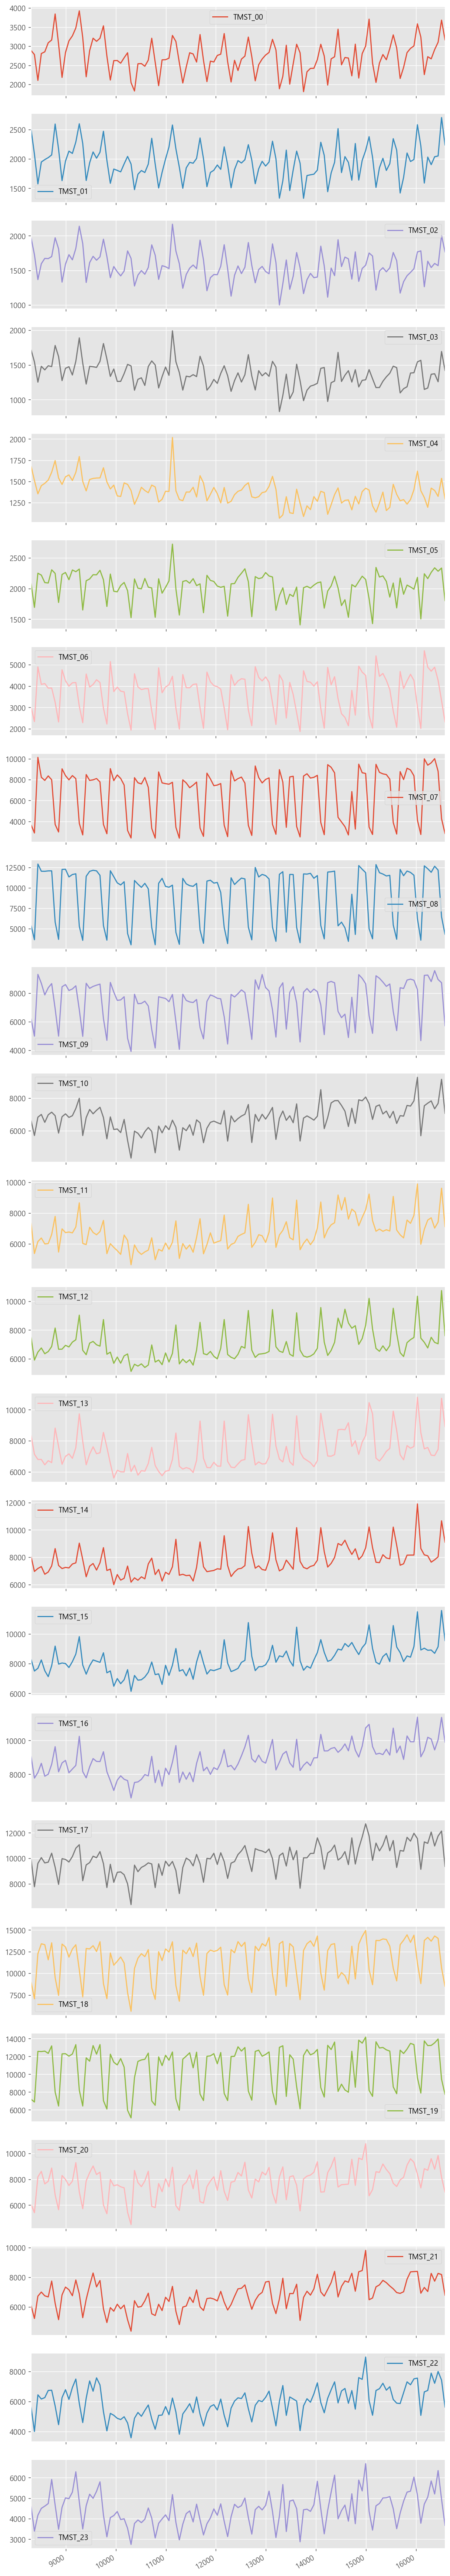

In [14]:
plt.figure(figsize = (10,40))
Nowon_0[Nowon_0.STD_YM.str.startswith('2020')].iloc[:,3:].plot(subplots = True,figsize=(10,70))
plt.show()

##### 2020년 데이터만 추출

In [15]:
Nowon_0[Nowon_0.STD_YM.str.startswith('2020')]

,STD_YM,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
8298,202002,20200201,공릉1동,2897.19,2514.98,1981.71,1726.73,1688.05,2095.13,3046.89,...,8088.62,8325.79,9106.54,10008.29,9073.67,7219.88,6096.85,6130.18,5683.26,4638.32
8367,202002,20200202,공릉1동,2785.29,2083.99,1729.33,1546.76,1513.86,1695.33,2351.17,...,6975.09,7517.82,7782.54,7779.19,7077.97,6898.87,5431.27,5231.01,4010.10,3402.79
8436,202002,20200203,공릉1동,2109.08,1579.18,1369.31,1255.17,1356.34,2253.44,4899.67,...,7192.22,7699.45,8116.13,9616.93,12281.08,12595.19,8206.74,6738.06,6454.59,4180.07
8505,202002,20200204,공릉1동,2812.85,1950.59,1599.10,1483.74,1452.76,2222.34,4084.80,...,7330.82,8259.84,8660.04,10071.45,13432.09,12572.95,8628.73,7012.11,6176.54,4513.64
8574,202002,20200205,공릉1동,2858.21,1991.73,1675.72,1431.51,1480.26,2100.20,4123.27,...,6769.14,7537.99,7896.86,9652.04,13322.90,12623.36,7660.24,6757.52,6269.56,4623.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16302,202005,20200527,공릉1동,2673.59,1905.74,1543.74,1368.44,1424.19,2267.05,4700.13,...,7655.52,8926.84,10102.20,12078.03,13732.25,13261.12,9614.30,8270.15,7903.59,5848.34
16371,202005,20200528,공릉1동,2917.00,2040.04,1603.09,1376.11,1396.43,2341.58,4885.91,...,7826.66,8704.89,9456.26,10984.90,14328.88,13553.57,8799.47,7745.28,7226.35,5213.17
16440,202005,20200529,공릉1동,3108.75,2053.61,1571.07,1260.65,1326.56,2285.92,4276.41,...,8042.97,9149.01,10058.28,11768.37,14057.18,13984.63,9859.39,8271.41,8012.32,6354.29
16509,202005,20200530,공릉1동,3688.23,2706.01,2007.45,1696.53,1538.98,2338.11,3327.76,...,10679.36,11578.04,11385.39,12161.53,10651.03,9458.24,8166.59,8189.62,7439.79,4958.02


In [16]:
Test_copy = Nowon_0.reset_index().drop('index',axis = 1 )
Test_copy

,STD_YM,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,20190201,공릉1동,3138.34,2126.77,1500.78,1472.43,1542.11,3221.08,5023.27,...,11096.62,12482.58,9061.47,15083.00,14500.06,11644.52,9917.35,8881.68,7825.79,5176.39
1,201902,20190202,공릉1동,3417.17,2356.11,1930.95,1622.80,1599.09,2350.87,2934.79,...,10891.72,11506.81,12074.48,11672.67,10172.01,8653.79,7500.20,7079.32,6161.78,4185.01
2,201902,20190203,공릉1동,2889.19,2079.97,1647.75,1362.25,1322.02,1760.85,2042.21,...,9211.39,9452.13,8923.23,8323.08,7365.91,6384.89,5990.46,5735.55,4580.78,3512.73
3,201902,20190204,공릉1동,2141.82,1670.01,1181.01,1067.98,1078.72,1559.75,1689.58,...,8030.25,8144.76,8393.55,8165.89,7456.11,6632.44,5914.72,5343.81,4065.47,2840.89
4,201902,20190205,공릉1동,1868.38,1213.55,887.54,851.99,925.81,1810.22,3993.24,...,16207.30,15746.58,16113.23,12607.54,9861.61,8500.77,8073.47,6733.01,5268.93,3702.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,202005,20200527,공릉1동,2673.59,1905.74,1543.74,1368.44,1424.19,2267.05,4700.13,...,7655.52,8926.84,10102.20,12078.03,13732.25,13261.12,9614.30,8270.15,7903.59,5848.34
237,202005,20200528,공릉1동,2917.00,2040.04,1603.09,1376.11,1396.43,2341.58,4885.91,...,7826.66,8704.89,9456.26,10984.90,14328.88,13553.57,8799.47,7745.28,7226.35,5213.17
238,202005,20200529,공릉1동,3108.75,2053.61,1571.07,1260.65,1326.56,2285.92,4276.41,...,8042.97,9149.01,10058.28,11768.37,14057.18,13984.63,9859.39,8271.41,8012.32,6354.29
239,202005,20200530,공릉1동,3688.23,2706.01,2007.45,1696.53,1538.98,2338.11,3327.76,...,10679.36,11578.04,11385.39,12161.53,10651.03,9458.24,8166.59,8189.62,7439.79,4958.02


EDA작업 완료!

## 20년 4월 18일 15시 노원구 지도 그리기

In [733]:
data_dir_dong= 'Data/bnd_dong_00_2019_2019'

In [734]:
Dong = gpd.read_file(os.path.join(data_dir_dong,'bnd_dong_00_2019_2019_2Q.shp'),encoding = 'cp949')

In [735]:
Dong.shape

(3512, 4)

In [736]:
# 한결이 주자.
Dong.head()

,base_date,adm_dr_cd,adm_dr_nm,geometry
0,20190630,3401111,목천읍,"POLYGON ((976281.256 1872572.889, 976310.111 1..."
1,20190630,3401131,풍세면,"POLYGON ((968741.044 1858717.018, 968735.892 1..."
2,20190630,3401132,광덕면,"POLYGON ((963262.901 1858071.870, 963324.231 1..."
3,20190630,3401133,북면,"POLYGON ((981373.134 1877117.916, 981422.790 1..."
4,20190630,3401134,성남면,"POLYGON ((975389.272 1862541.207, 975396.147 1..."


In [738]:
A = '월계1동,월계2동,월계3동,공릉1동,공릉2동,하계1동,하계2동,중계본동,중계1동,중계4동,중계2·3동,상계1동,상계2동,상계3·4동,상계5동,상계6·7동,상계8동,상계9동,상계10동'
Nowon_list = A.split(',')

In [740]:
data_list= []
for i in Nowon_list:
    data_list.append(Dong[Dong.adm_dr_nm == i])

In [741]:
# 노원구 파일 정리
Nowon_data = pd.concat(data_list,axis = 0)

In [742]:
Flow = pd.read_csv('Input/Flow_SK/Four_Region_Flow_TIme.csv',index_col = [0])

In [743]:
Nowon_list_2 = ['월계1동',
 '월계2동',
 '월계3동',
 '공릉1동',
 '공릉2동',
 '하계1동',
 '하계2동',
 '중계본동',
 '중계1동',
 '중계4동',
 '중계2.3동',
 '상계1동',
 '상계2동',
 '상계3.4동',
 '상계5동',
 '상계6.7동',
 '상계8동',
 '상계9동',
 '상계10동']

In [744]:
Flow_list = []
for i in Nowon_list_2:
    Flow_list.append(Flow[Flow.HDONG_NM == i])

In [745]:
Nowon_Flow = pd.concat(Flow_list,axis = 0)

In [746]:
Nowon_Flow.STD_YMD = Nowon_Flow.STD_YMD.apply(lambda x : str(x))

In [747]:
Nowon_Flow_2020 = Nowon_Flow[Nowon_Flow.STD_YMD.str.startswith('2020')]

In [753]:
# 2020년 4월 18일 15시 노원구 인구수
Nowon_04_18 = Nowon_Flow_2020[Nowon_Flow_2020.STD_YMD == '20200418'][['HDONG_NM','TMST_15']]
Nowon_04_18

,HDONG_NM,TMST_15
13608,월계1동,3617.34
13609,월계2동,2279.30
13610,월계3동,7450.37
13611,공릉1동,10461.28
13612,공릉2동,10814.46
13613,하계1동,3648.94
13614,하계2동,4285.79
13615,중계본동,2784.81
13616,중계1동,2911.27
13617,중계4동,2964.12


In [125]:
Nowon_list = Target_data.HDONG_NM.values

In [139]:
Nowon_list

array(['월계1동', '월계2동', '월계3동', '공릉1동', '공릉2동', '하계1동', '하계2동', '중계본동',
       '중계1동', '중계4동', '중계2,3동', '상계1동', '상계2동', '상계3,4동', '상계5동',
       '상계6,7동', '상계8동', '상계9동', '상계10동'], dtype=object)

### 지도 그리기 작업 순서 시작

1. 행정동 코드 및 유동인구수를 표현하는 데이터 작업

In [50]:
Nowon_data.adm_dr_cd

1583    1111051
1584    1111052
1585    1111053
1601    1111079
1586    1111056
1587    1111058
1588    1111059
1589    1111060
1590    1111061
1591    1111064
1600    1111078
1592    1111065
1593    1111066
1598    1111076
1594    1111069
1599    1111077
1595    1111072
1596    1111073
1597    1111074
Name: adm_dr_cd, dtype: object

In [751]:
Nowon_04_18_map =Nowon_Flow_2020[Nowon_Flow_2020.STD_YMD == '20200418'][['HDONG_CD',"TMST_15"]]
Nowon_04_18_map.HDONG_CD = Nowon_data.adm_dr_cd.values

In [752]:
Nowon_04_18_map

,HDONG_CD,TMST_15
13608,1111051,3617.34
13609,1111052,2279.30
13610,1111053,7450.37
13611,1111079,10461.28
13612,1111056,10814.46
13613,1111058,3648.94
13614,1111059,4285.79
13615,1111060,2784.81
13616,1111061,2911.27
13617,1111064,2964.12


2. 노원구 지역만 나오게 Json파일 수정

In [775]:
geo_path = 'Data/skorea-submunicipalities-2018-geo.json'
geo_str = json.load(open(geo_path,encoding = 'utf-8'))

In [776]:
# Raw data 보존하고자 geo_test_str라는 이름으로 데이터 복사
geo_test_str = geo_str

In [777]:
geo_list= []

In [778]:
want_data = Nowon_data[['adm_dr_cd','adm_dr_nm']]
want_data

,adm_dr_cd,adm_dr_nm
1583,1111051,월계1동
1584,1111052,월계2동
1585,1111053,월계3동
1601,1111079,공릉1동
1586,1111056,공릉2동
1587,1111058,하계1동
1588,1111059,하계2동
1589,1111060,중계본동
1590,1111061,중계1동
1591,1111064,중계4동


In [779]:
geo_copy = geo_str['features']

In [780]:
for i in range(3504):
    for j in want_data['adm_dr_nm'].values:
        if geo_copy[i]['properties']['name'] == j:
            geo_list.append(geo_copy[i])

In [781]:
# 노원구만 확인 (19개 확인!)
len(geo_list)

19

In [782]:
# 기존 데이터에 대입
geo_test_str['features'] = geo_list

In [783]:
seoul_map = folium.Map(location = [37.650641, 127.074564],zoom_start = 12,tiles = 'cartodbpositron')
seoul_map.choropleth(geo_data = geo_test_str,
                    data = Nowon_17_data,
                    columns = list(Nowon_17_data.columns),
                    fill_color = 'PuRd',
                    key_on = 'properties.code',
                    highlight = True,
                    fill_opacity = 0.5, line_opacity = 1,
                    legend_name = 'Population per time')

In [812]:
seoul_map

# 밀집도에 대한 기준 설정 코드 시작

## 1. 공휴일,주말 제외 작업
- 공휴일
```
4/15 국회의원 선거 수요일
4/30 부처님 오신날 목요일
5/1 근로자의 날
5/5 어린이날 화요일
```
- 이유 : 상대적으로 아주 낮은 유동인구 데이터를 보여주었으므로 제거합니다.


<h3>이유 설명 - 1가지 예시(<b>공휴일</b>)</h3>

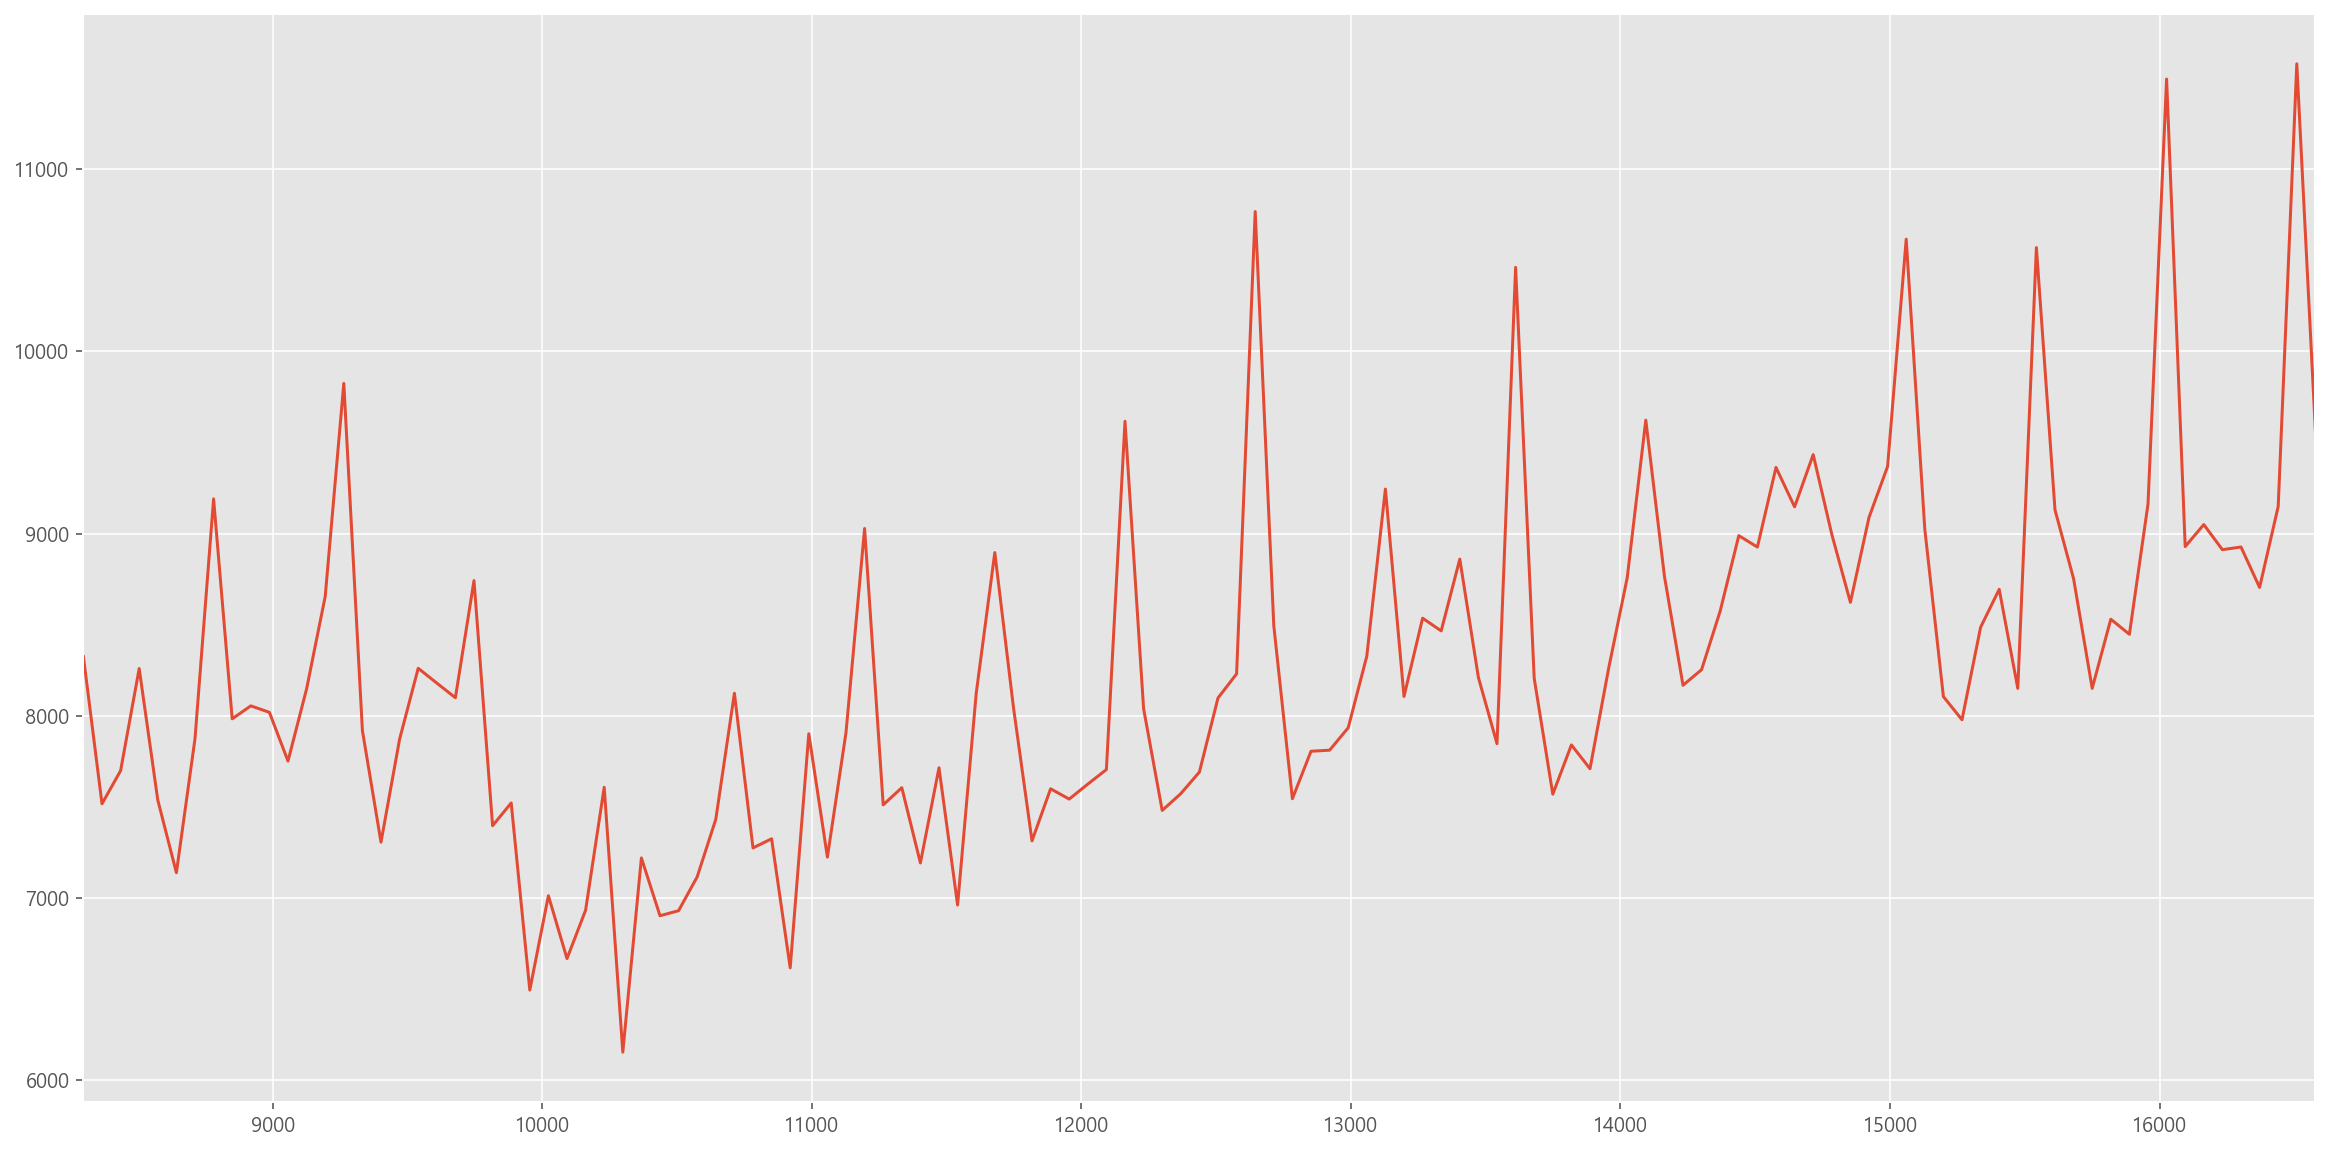

In [808]:
Nowon_Flow_2020[Nowon_Flow_2020.HDONG_NM == '공릉1동'].TMST_15.plot(figsize = (20,10))

In [810]:
np.argmin(Nowon_Flow_2020[Nowon_Flow_2020.HDONG_NM == '공릉1동'].TMST_15)

10299

In [811]:
# 공휴일 확인_3월 1일
Nowon_Flow_2020[Nowon_Flow_2020.HDONG_NM == '공릉1동'].loc[10299]

STD_YMD     2020-03-01 00:00:00
HDONG_NM                   공릉1동
TMST_00                 2051.30
TMST_01                 1916.84
TMST_02                 1675.82
TMST_03                 1488.86
TMST_04                 1396.12
TMST_05                 1527.22
TMST_06                 1950.07
TMST_07                 2421.27
TMST_08                 3054.31
TMST_09                 3935.95
TMST_10                 4326.47
TMST_11                 4654.85
TMST_12                 5124.74
TMST_13                 6022.53
TMST_14                 6191.10
TMST_15                 6154.88
TMST_16                 6604.26
TMST_17                 6377.82
TMST_18                 5640.23
TMST_19                 5112.54
TMST_20                 4512.77
TMST_21                 4376.18
TMST_22                 3584.85
TMST_23                 2754.39
Name: 10299, dtype: object

공휴일인 3월 1일이 가장 낮은 값을 지닌다. 이 값은 앞으로 인구밀집도에 대한 기준을 보수적으로 평가하도록 유도하기 때문에 제거합니다.

##### 2020년 데이터 추출

In [785]:
Nowon_Flow_2020 = Nowon_Flow_2020.drop('STD_YM',axis = 1)

In [786]:
Nowon_Flow_2020.STD_YMD = pd.to_datetime(Nowon_Flow_2020.STD_YMD,format = '%Y-%m-%d')

In [787]:
Nowon_Flow_2020 = Nowon_Flow_2020.drop('HDONG_CD',axis = 1)

In [788]:
Nowon_Flow_2020

,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
8295,2020-02-01,월계1동,1224.75,946.52,747.22,646.92,636.93,842.70,1239.64,1357.39,...,3299.56,3334.28,3737.88,4078.07,4120.24,3640.17,2964.86,3054.77,2457.96,2091.30
8364,2020-02-02,월계1동,1263.20,851.04,687.91,567.64,544.09,633.15,893.51,1049.86,...,2987.66,3198.18,3522.36,3367.63,3038.74,2652.55,2685.82,2076.58,1868.48,1337.21
8433,2020-02-03,월계1동,858.15,670.70,501.01,451.49,523.23,929.03,1659.18,3063.60,...,2966.19,3035.10,3547.69,3769.21,4540.88,4703.03,3238.44,3338.73,2591.32,1698.43
8502,2020-02-04,월계1동,1219.99,717.98,538.52,476.98,585.27,817.12,1479.53,3102.22,...,2771.85,3100.75,3437.22,4129.69,4330.45,5011.05,3431.15,3186.58,2619.57,1779.26
8571,2020-02-05,월계1동,1303.77,769.52,548.88,491.66,607.06,869.02,1418.61,2921.00,...,2810.34,2905.88,3380.07,3549.63,5041.79,4654.24,3531.80,3355.82,2713.89,1903.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,2020-05-27,상계10동,526.50,306.80,212.48,185.12,198.11,460.44,820.96,2023.55,...,1859.85,2144.51,2206.98,2382.86,2857.28,2553.56,1805.99,1533.32,1555.04,992.79
16386,2020-05-28,상계10동,580.92,335.48,268.36,203.05,212.62,495.44,824.10,1980.80,...,1872.53,1934.85,2155.94,2466.64,2776.55,2539.54,1781.59,1437.23,1414.54,947.89
16455,2020-05-29,상계10동,546.81,331.68,254.87,207.21,220.84,424.12,802.17,1717.65,...,1939.32,2124.01,2192.16,2561.72,2862.79,2609.14,2051.38,1607.75,1576.61,1122.49
16524,2020-05-30,상계10동,674.02,465.30,315.24,238.59,215.12,407.86,591.97,914.78,...,2377.57,2352.16,2402.33,2634.94,2396.65,1942.30,1575.89,1599.55,1499.48,910.01


In [789]:
Nowon_Flow_2020_except = Nowon_Flow_2020.drop([13404,14439,14508,14784],axis = 0)

In [790]:
Nowon_Flow_2020_except

,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
8295,2020-02-01,월계1동,1224.75,946.52,747.22,646.92,636.93,842.70,1239.64,1357.39,...,3299.56,3334.28,3737.88,4078.07,4120.24,3640.17,2964.86,3054.77,2457.96,2091.30
8364,2020-02-02,월계1동,1263.20,851.04,687.91,567.64,544.09,633.15,893.51,1049.86,...,2987.66,3198.18,3522.36,3367.63,3038.74,2652.55,2685.82,2076.58,1868.48,1337.21
8433,2020-02-03,월계1동,858.15,670.70,501.01,451.49,523.23,929.03,1659.18,3063.60,...,2966.19,3035.10,3547.69,3769.21,4540.88,4703.03,3238.44,3338.73,2591.32,1698.43
8502,2020-02-04,월계1동,1219.99,717.98,538.52,476.98,585.27,817.12,1479.53,3102.22,...,2771.85,3100.75,3437.22,4129.69,4330.45,5011.05,3431.15,3186.58,2619.57,1779.26
8571,2020-02-05,월계1동,1303.77,769.52,548.88,491.66,607.06,869.02,1418.61,2921.00,...,2810.34,2905.88,3380.07,3549.63,5041.79,4654.24,3531.80,3355.82,2713.89,1903.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,2020-05-27,상계10동,526.50,306.80,212.48,185.12,198.11,460.44,820.96,2023.55,...,1859.85,2144.51,2206.98,2382.86,2857.28,2553.56,1805.99,1533.32,1555.04,992.79
16386,2020-05-28,상계10동,580.92,335.48,268.36,203.05,212.62,495.44,824.10,1980.80,...,1872.53,1934.85,2155.94,2466.64,2776.55,2539.54,1781.59,1437.23,1414.54,947.89
16455,2020-05-29,상계10동,546.81,331.68,254.87,207.21,220.84,424.12,802.17,1717.65,...,1939.32,2124.01,2192.16,2561.72,2862.79,2609.14,2051.38,1607.75,1576.61,1122.49
16524,2020-05-30,상계10동,674.02,465.30,315.24,238.59,215.12,407.86,591.97,914.78,...,2377.57,2352.16,2402.33,2634.94,2396.65,1942.30,1575.89,1599.55,1499.48,910.01


In [793]:
Nowon_Flow_2020_except = Nowon_Flow_2020_except[Nowon_Flow_2020_except.STD_YMD.apply(lambda x : x.weekday()) <5]

주말, 공휴일 제외 완료

In [794]:
Nowon_Flow_2020_except

,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
8433,2020-02-03,월계1동,858.15,670.70,501.01,451.49,523.23,929.03,1659.18,3063.60,...,2966.19,3035.10,3547.69,3769.21,4540.88,4703.03,3238.44,3338.73,2591.32,1698.43
8502,2020-02-04,월계1동,1219.99,717.98,538.52,476.98,585.27,817.12,1479.53,3102.22,...,2771.85,3100.75,3437.22,4129.69,4330.45,5011.05,3431.15,3186.58,2619.57,1779.26
8571,2020-02-05,월계1동,1303.77,769.52,548.88,491.66,607.06,869.02,1418.61,2921.00,...,2810.34,2905.88,3380.07,3549.63,5041.79,4654.24,3531.80,3355.82,2713.89,1903.84
8640,2020-02-06,월계1동,1231.53,758.19,609.22,593.42,569.23,834.12,1399.82,2781.79,...,2898.15,3050.11,3517.23,3861.32,5557.54,5204.34,3334.35,2837.63,2846.09,1898.65
8709,2020-02-07,월계1동,1273.54,768.37,594.21,531.97,628.19,944.11,1463.20,2948.88,...,2992.65,3239.19,3587.32,4568.28,5051.11,5882.11,4017.81,3278.65,2717.12,2354.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,2020-05-25,상계10동,362.18,242.94,167.21,140.52,206.04,465.83,786.05,1753.52,...,1837.36,2050.94,2144.29,2392.15,2815.85,2518.88,1688.80,1445.76,1350.13,805.21
16248,2020-05-26,상계10동,495.78,406.15,258.75,191.86,221.23,432.55,884.65,1817.10,...,1931.22,1959.83,2206.00,2328.48,2621.54,2383.62,1638.21,1354.99,1360.46,836.90
16317,2020-05-27,상계10동,526.50,306.80,212.48,185.12,198.11,460.44,820.96,2023.55,...,1859.85,2144.51,2206.98,2382.86,2857.28,2553.56,1805.99,1533.32,1555.04,992.79
16386,2020-05-28,상계10동,580.92,335.48,268.36,203.05,212.62,495.44,824.10,1980.80,...,1872.53,1934.85,2155.94,2466.64,2776.55,2539.54,1781.59,1437.23,1414.54,947.89


In [795]:
HDONG_list = Nowon_Flow_2020_except.HDONG_NM.unique() # 특수문자  : 점

In [796]:
number_list = np.arange(len(HDONG_list))

In [797]:
set_dict = dict(zip(number_list,HDONG_list))
set_dict

{0: '월계1동',
 1: '월계2동',
 2: '월계3동',
 3: '공릉1동',
 4: '공릉2동',
 5: '하계1동',
 6: '하계2동',
 7: '중계본동',
 8: '중계1동',
 9: '중계4동',
 10: '중계2.3동',
 11: '상계1동',
 12: '상계2동',
 13: '상계3.4동',
 14: '상계5동',
 15: '상계6.7동',
 16: '상계8동',
 17: '상계9동',
 18: '상계10동'}

In [798]:
HDONG_dict = dict(list(Nowon_Flow_2020_except.groupby('HDONG_NM')))

In [799]:
mod = sys.modules[__name__]
for i, name in enumerate(HDONG_list):
    setattr(mod,"Nowon_{}".format(i),HDONG_dict[name])

In [800]:
# 확인
Nowon_0

,STD_YMD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
8433,2020-02-03,월계1동,858.15,670.70,501.01,451.49,523.23,929.03,1659.18,3063.60,...,2966.19,3035.10,3547.69,3769.21,4540.88,4703.03,3238.44,3338.73,2591.32,1698.43
8502,2020-02-04,월계1동,1219.99,717.98,538.52,476.98,585.27,817.12,1479.53,3102.22,...,2771.85,3100.75,3437.22,4129.69,4330.45,5011.05,3431.15,3186.58,2619.57,1779.26
8571,2020-02-05,월계1동,1303.77,769.52,548.88,491.66,607.06,869.02,1418.61,2921.00,...,2810.34,2905.88,3380.07,3549.63,5041.79,4654.24,3531.80,3355.82,2713.89,1903.84
8640,2020-02-06,월계1동,1231.53,758.19,609.22,593.42,569.23,834.12,1399.82,2781.79,...,2898.15,3050.11,3517.23,3861.32,5557.54,5204.34,3334.35,2837.63,2846.09,1898.65
8709,2020-02-07,월계1동,1273.54,768.37,594.21,531.97,628.19,944.11,1463.20,2948.88,...,2992.65,3239.19,3587.32,4568.28,5051.11,5882.11,4017.81,3278.65,2717.12,2354.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16161,2020-05-25,월계1동,997.87,771.30,671.50,613.67,695.67,1089.44,1946.11,3527.06,...,3477.74,3308.48,3779.32,4147.33,5425.04,5061.79,3530.75,3207.02,2990.53,2313.90
16230,2020-05-26,월계1동,1248.86,1084.88,870.66,653.10,775.04,1134.00,1954.21,3587.84,...,3394.91,3563.93,4140.24,4306.43,6291.76,5997.52,3575.02,2910.86,2784.60,2150.05
16299,2020-05-27,월계1동,1146.38,896.05,737.45,671.54,755.96,1160.34,1949.41,3131.96,...,3322.70,3471.18,4167.57,4847.09,6143.11,5064.81,4264.05,3817.54,3062.96,2258.76
16368,2020-05-28,월계1동,1261.55,887.52,744.98,671.76,788.23,1120.54,1982.48,3292.12,...,3284.98,3221.46,3986.17,4610.59,6180.90,5353.78,3756.31,3512.04,3302.51,2391.83


지역별 면적 출력

2020년 4월 18일 15시 노원구 인구수 출력

In [719]:
# 2020년 4월 18일 15시 노원구 인구수
Target_data_04_18 = Nowon_Flow_2020[Nowon_Flow_2020.STD_YMD == '20200418'][['HDONG_NM','TMST_15']]
Target_data_04_18

,HDONG_NM,TMST_15
13608,월계1동,3617.34
13609,월계2동,2279.30
13610,월계3동,7450.37
13611,공릉1동,10461.28
13612,공릉2동,10814.46
13613,하계1동,3648.94
13614,하계2동,4285.79
13615,중계본동,2784.81
13616,중계1동,2911.27
13617,중계4동,2964.12


### "인구 / 면적 " 연산 작업 실시

##### 1.  면적 구하기

In [546]:
HDONG_list = list(map(lambda x : x.replace('.',','),HDONG_list))

In [547]:
HDONG_area = []
for name in HDONG_list:
    Dong_1 = Nowon_data.loc[Nowon_data.adm_dr_nm == name, "geometry"].squeeze()
    Dong_1_area = Dong_1.area / 10**6 # 미터(m)단위이므로 km제곱으로 변경하려면 10^6으로 나눈다.
    HDONG_area.append(Dong_1_area)

In [548]:
HDONG_area

[1.1066152844689692,
 2.0032578796386997,
 1.1673902361905482,
 1.2622928793656416,
 6.978352345452191,
 1.5258901509676641,
 0.4996410713584865,
 2.1814068221377094,
 0.6229729302881342,
 1.5182823229734073,
 0.9183809347227408,
 5.39848286475845,
 0.6226488542036825,
 5.207703732770095,
 0.9061990584699573,
 1.4491883428325287,
 0.6658400808790135,
 0.7188955558879967,
 0.8085968566617984]

##### 2. 연산 작업 진행

In [721]:
Target_data_04_18.TMST_15 = Target_data_04_18.TMST_15 / HDONG_area

In [722]:
Target_data_04_18

,HDONG_NM,TMST_15
13608,월계1동,3268.83
13609,월계2동,1137.80
13610,월계3동,6382.07
13611,공릉1동,8287.52
13612,공릉2동,1549.72
13613,하계1동,2391.35
13614,하계2동,8577.74
13615,중계본동,1276.61
13616,중계1동,4673.19
13617,중계4동,1952.29


###  밀집도 기준 설정
- 3월 2일부터 4월 17일 15시 유동인구 데이터 활용

In [726]:
def Part_divide_except_04(data,name): # 4월달만
    Test_1 = data.reset_index().drop('index',axis = 1)
    
    # 특수문자 기호를 콤마(',')
    Test_1.HDONG_NM = Test_1.HDONG_NM.str.replace('.',',')
    
    ## 면적을 구하는 코드
    # 1.shp파일 불러오기
    data_dir_dong= 'Data/bnd_dong_00_2019_2019'
    Dong = gpd.read_file(os.path.join(data_dir_dong,'bnd_dong_00_2019_2019_2Q.shp'),encoding = 'cp949')
    
    # 특수문자 변환 점('.')으로
    Dong.adm_dr_nm= Dong.adm_dr_nm.str.replace('·','.')
    
    # 2.노원구 데이터만 추출, 현재 특수기호 문자 점('.')으로 표현
    A = '월계1동,월계2동,월계3동,공릉1동,공릉2동,하계1동,하계2동,중계본동,중계1동,중계4동,중계2.3동,상계1동,상계2동,상계3.4동,상계5동,상계6.7동,상계8동,상계9동,상계10동'
    Nowon_list = A.split(',')
    data_list= []

    for i in Nowon_list:
        data_list.append(Dong[Dong.adm_dr_nm == i])

    # 3.노원구 파일 정리
    Nowon_data = pd.concat(data_list,axis = 0)

    # 특수문자 기호를 콤마(,)로 변경
    Nowon_data.adm_dr_nm = Nowon_data.adm_dr_nm.str.replace('.',',')
    
    # 4.면적 구하기
    Dong_1 = Nowon_data.loc[Nowon_data.adm_dr_nm == name, "geometry"].squeeze()
    Dong_1_area = Dong_1.area / 10**6 # 미터(m)단위이므로 km제곱으로 변경하려면 10^6으로 나눈다.
    
    
    ## 5.1km제곱당 면적
    Population = Test_1.loc[32:53].TMST_18 / Dong_1_area
    
    
    # 6. 과거 3 분야로 
    Standard = pd.qcut(Population,5).cat.categories
    
    return Standard

구간을 저장하는 코드

In [727]:
Nowon_standard_15 = []
Nowon_standard_15.append(Part_divide_except_04(Nowon_0,'월계1동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_1,'월계2동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_2,'월계3동'))

Nowon_standard_15.append(Part_divide_except_04(Nowon_3,'공릉1동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_4,'공릉2동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_5,'하계1동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_6,'하계2동'))

Nowon_standard_15.append(Part_divide_except_04(Nowon_7,'중계본동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_8,'중계1동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_9,'중계4동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_10,'중계2,3동'))


Nowon_standard_15.append(Part_divide_except_04(Nowon_11,'상계1동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_12,'상계2동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_13,'상계3,4동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_14,'상계5동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_15,'상계6,7동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_16,'상계8동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_17,'상계9동'))
Nowon_standard_15.append(Part_divide_except_04(Nowon_18,'상계10동'))

In [729]:
Target_data_04_18.HDONG_NM = Target_data_04_18.HDONG_NM.str.replace('.',',')

In [730]:
Target_data_04_18['Standard'] = Nowon_standard_15

In [816]:
Target_data_04_18.columns = ['HDONG_NM','TMST_15','Standard']

In [817]:
Target_data_04_18

,HDONG_NM,TMST_15,Standard
13608,월계1동,3268.83,"IntervalIndex([(3131.25, 4295.869], (4295.869,..."
13609,월계2동,1137.80,"IntervalIndex([(1043.6390000000001, 1105.874],..."
13610,월계3동,6382.07,"IntervalIndex([(4752.129, 5615.522], (5615.522..."
13611,공릉1동,8287.52,"IntervalIndex([(8388.242, 9746.454], (9746.454..."
13612,공릉2동,1549.72,"IntervalIndex([(1271.72, 1458.285], (1458.285,..."
13613,하계1동,2391.35,"IntervalIndex([(2312.249, 2626.758], (2626.758..."
13614,하계2동,8577.74,"IntervalIndex([(6055.906, 9290.745], (9290.745..."
13615,중계본동,1276.61,"IntervalIndex([(1082.323, 1164.362], (1164.362..."
13616,중계1동,4673.19,"IntervalIndex([(3522.961, 4109.039], (4109.039..."
13617,중계4동,1952.29,"IntervalIndex([(1386.329, 1724.966], (1724.966..."


In [818]:
# 데이터 저장
Target_data_04_18.to_csv("Data/Target_data_04_18.csv")